In [1]:
# from glmhmm import *
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('/data/users/weixuan/work/model')
print(sys.path)
from fitting import *
from analysis import find_permutation, evaluate_classification, calculate_match_rate, matrix_comp
from model.analysis import analyze_stored_models
from model.util import compute_transition_probabilities


['/data/users/weixuan/work/model/glmhmm', '/home/wliu25/miniconda3/envs/glmhmm/lib/python38.zip', '/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8', '/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/lib-dynload', '', '/home/wliu25/.local/lib/python3.8/site-packages', '/data/users/weixuan/work/model/ssm', '/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages', '/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/setuptools/_vendor', '/data/users/weixuan/work/model']


/home/wliu25/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from IDglmhmm import InputDrivenGLMHMM
N=10000
dim_output=2
D = 2
K = 2
testN = 10000
# # Generate true model and data
X_total, Y_total, states_seq_total, P_base_true, W_in_true, w_true, pi0_true, m_true = gen_true_param(N+testN, K, D, dim_output, seed=None, A_true=None, w_true=None, pi0_true=None, model_type = "inputdriven")

X, X_test = X_total[:N], X_total[N:]
Y, Y_test = Y_total[:N], Y_total[N:]
states_seq, true_states_seq = states_seq_total[:N], states_seq_total[N:]

sinusoidal weight: [[0.06101838 0.88946608 0.04951554]
 [0.12889174 0.69941978 0.17168847]
 [0.03717164 0.18537358 0.77745478]]
[[0.86409102 0.13590898]
 [0.05257254 0.94742746]]


In [16]:
m_true.W_in

array([[ 0.76976909,  0.4621827 , -0.33487849],
       [-0.49787312, -0.44771062,  0.7329604 ]])

In [30]:
# Train model
m = InputDrivenGLMHMM(N, K, D, dim_output, 1.0)
lls_pred, P_base_pred, W_in_pred, w_pred, pi0_pred = m.fit(Y, X)
pred_states_seq = m.mostprob_states(X_test, Y_test).astype(int)

perm = find_permutation(pred_states_seq, true_states_seq)
pred_states_perm = np.array([perm[pred_states_seq[idx]] for idx in range(len(true_states_seq))])
P_base_perm = P_base_pred[np.ix_(perm, perm)]
W_in_perm = W_in_pred[perm, :]
w_perm = w_pred[perm, :, :]

Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20
Iter 21
Iter 22
Iter 23
Iter 24
Iter 25
Iter 26
Iter 27


In [31]:
P_base_perm

array([[0.9907585 , 0.0092415 ],
       [0.00456753, 0.99543247]])

([], [])

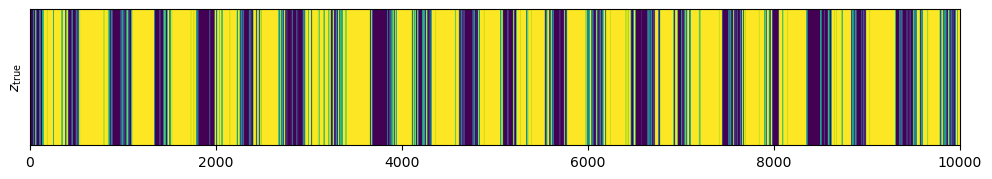

In [36]:
plt.figure(figsize=(12, 6))
timebin=10000
cmap = 'viridis'
vmin, vmax = 0, np.max(true_states_seq)
# First subplot
plt.subplot(311)
plt.imshow(true_states_seq[None, :], aspect="auto", cmap=cmap, vmin=vmin, vmax=vmax)
plt.xlim(0, timebin)
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])


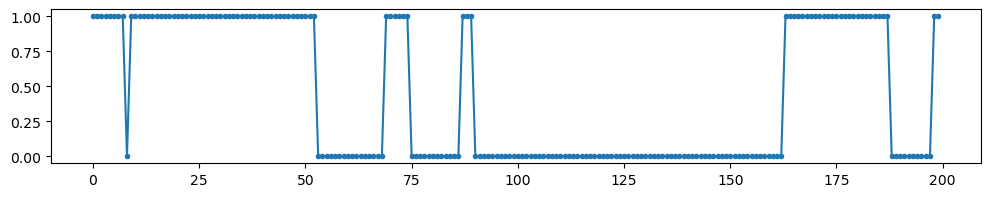

In [39]:
plt.figure(figsize = (12, 2))
plt.plot(states_seq[:200],'.-')

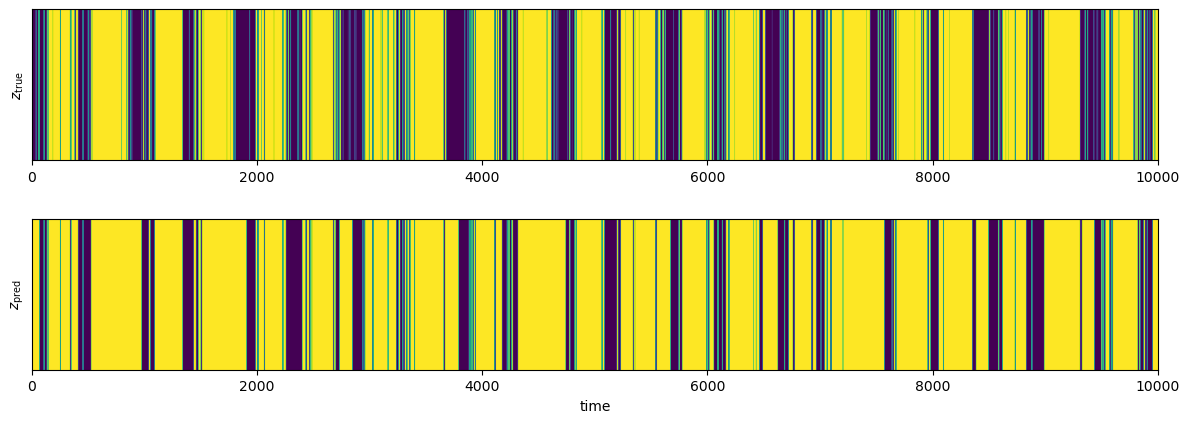

In [32]:
plt.figure(figsize=(12, 6))
timebin=10000
cmap = 'viridis'
vmin, vmax = 0, np.max(true_states_seq)
# First subplot
plt.subplot(311)
plt.imshow(true_states_seq[None, :], aspect="auto", cmap=cmap, vmin=vmin, vmax=vmax)
plt.xlim(0, timebin)
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])

# # Second subplot
# plt.subplot(312)
# # plt.imshow(true_states_seq_fit[None, :], aspect="auto", cmap=cmap, vmin=vmin, vmax=vmax)
# # plt.xlim(0, timebin)
# # plt.ylabel("$z_{\\mathrm{true fit}}$")
# # plt.yticks([])

# Third subplot (New Addition)
plt.subplot(312)
plt.imshow(pred_states_perm[None, :], aspect="auto", cmap=cmap, vmin=vmin, vmax=vmax)  # Replace `extra_data` with your third data source
plt.xlim(0, timebin)
plt.ylabel("$z_{\\mathrm{pred}}$")
plt.yticks([])
plt.xlabel("time")

plt.tight_layout()

# plt.show()

In [29]:
W_in_perm, W_in_true
P_t, _ = compute_transition_probabilities(P_base_perm, X_test, W_in_perm)
P_t

[[4.14841157e-02 9.58515884e-01]
 [3.32545890e-04 9.99667454e-01]]
[[4.14943743e-02 9.58505626e-01]
 [3.32631657e-04 9.99667368e-01]]
[[4.15011336e-02 9.58498866e-01]
 [3.32688169e-04 9.99667312e-01]]
[[4.15044783e-02 9.58495522e-01]
 [3.32716133e-04 9.99667284e-01]]
[[4.15044940e-02 9.58495506e-01]
 [3.32716264e-04 9.99667284e-01]]
[[4.15012675e-02 9.58498732e-01]
 [3.32689288e-04 9.99667311e-01]]
[[4.14948867e-02 9.58505113e-01]
 [3.32635941e-04 9.99667364e-01]]
[[4.14854402e-02 9.58514560e-01]
 [3.32556964e-04 9.99667443e-01]]
[[4.14730173e-02 9.58526983e-01]
 [3.32453105e-04 9.99667547e-01]]
[[4.14577080e-02 9.58542292e-01]
 [3.32325118e-04 9.99667675e-01]]
[[4.14396026e-02 9.58560397e-01]
 [3.32173761e-04 9.99667826e-01]]
[[4.14187918e-02 9.58581208e-01]
 [3.31999795e-04 9.99668000e-01]]
[[4.13953666e-02 9.58604633e-01]
 [3.31803982e-04 9.99668196e-01]]
[[4.13694181e-02 9.58630582e-01]
 [3.31587088e-04 9.99668413e-01]]
[[4.13410372e-02 9.58658963e-01]
 [3.31349877e-04 9.99668650e-

array([[[4.14841157e-02, 4.14943743e-02, 4.15011336e-02, ...,
         8.27074799e-03, 8.25565988e-03, 8.24089500e-03],
        [9.58515884e-01, 9.58505626e-01, 9.58498866e-01, ...,
         9.91729252e-01, 9.91744340e-01, 9.91759105e-01]],

       [[3.32545890e-04, 3.32631657e-04, 3.32688169e-04, ...,
         6.40969458e-05, 6.39790496e-05, 6.38636825e-05],
        [9.99667454e-01, 9.99667368e-01, 9.99667312e-01, ...,
         9.99935903e-01, 9.99936021e-01, 9.99936136e-01]]])

[[0.98488268 0.01511732]
 [0.36249128 0.63750872]]
[[0.98485555 0.01514445]
 [0.36207056 0.63792944]]
[[0.98482262 0.01517738]
 [0.36156136 0.63843864]]
[[0.98478392 0.01521608]
 [0.3609647  0.6390353 ]]
[[0.98473947 0.01526053]
 [0.36028165 0.63971835]]
[[0.98468927 0.01531073]
 [0.35951332 0.64048668]]
[[0.98463332 0.01536668]
 [0.35866086 0.64133914]]
[[0.98457164 0.01542836]
 [0.35772546 0.64227454]]
[[0.98450421 0.01549579]
 [0.35670835 0.64329165]]
[[0.98443102 0.01556898]
 [0.35561077 0.64438923]]
[[0.98435206 0.01564794]
 [0.35443403 0.64556597]]
[[0.98426731 0.01573269]
 [0.35317944 0.64682056]]
[[0.98417675 0.01582325]
 [0.35184837 0.64815163]]
[[0.98408035 0.01591965]
 [0.35044219 0.64955781]]
[[0.98397808 0.01602192]
 [0.34896234 0.65103766]]
[[0.98386991 0.01613009]
 [0.34741026 0.65258974]]
[[0.98375579 0.01624421]
 [0.34578741 0.65421259]]
[[0.98363568 0.01636432]
 [0.34409531 0.65590469]]
[[0.98350954 0.01649046]
 [0.34233549 0.65766451]]
[[0.98337732 0.01662268]
 [0.34

(0.0, 10000.0)

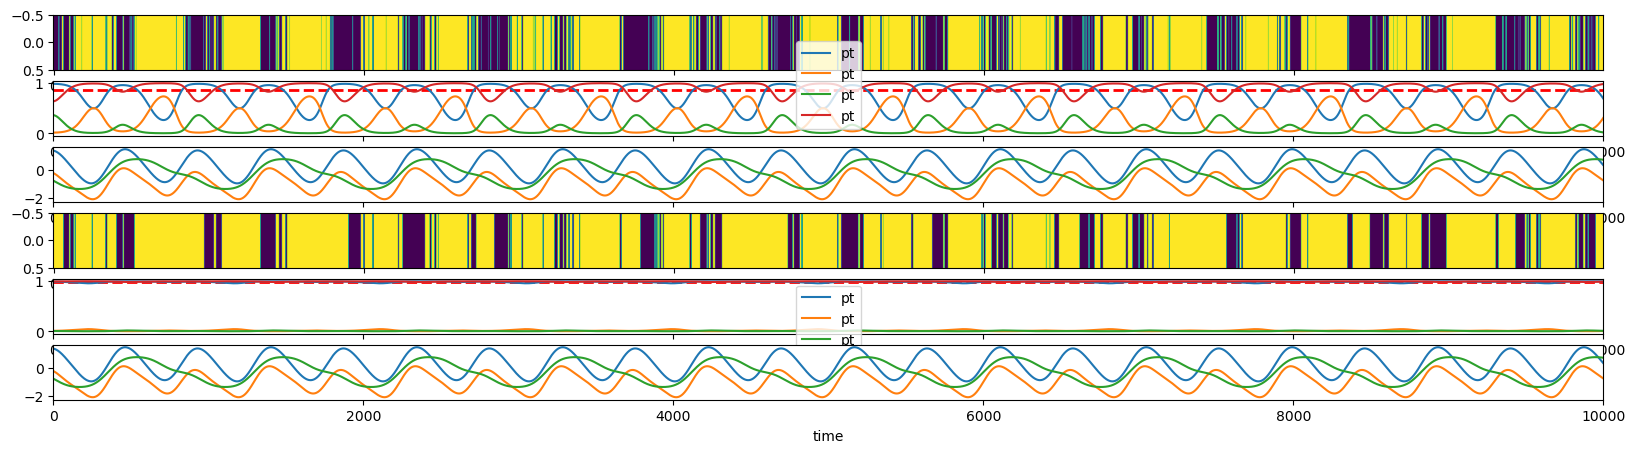

In [33]:
fig, ax = plt.subplots(6, 1, figsize=(20,5))
ax[0].imshow(true_states_seq[None,:], aspect='auto')
P_t, P_base = compute_transition_probabilities(P_base_true, X_test, W_in_true)  #(K, K, N)

# plt.plot(P_t[0,0])
ax[1].axhline(y=P_base[0,0], color='r', linestyle='--', linewidth=2)
ax[1].plot(P_t.reshape((-1, P_t.shape[2])).T, label='pt')#[f'pt_{ii}' for ii in range(P_base_true**2)])
ax[1].set_xlim(left=0, right = P_t.shape[2])
ax[1].legend()

n_feature = X.shape[1]
for d in range(n_feature):
    ax[2].plot(X_test[:, d], label=f"feature {d+1}" if d < n_feature - 1 else 'bias')
    ax[2].set_xlabel("time")
ax[2].set_xlim(left=0, right = P_t.shape[2])


ax[3].imshow(pred_states_perm[None,:], aspect='auto')
P_t_perm, P_base_perm = compute_transition_probabilities(P_base_perm, X_test, W_in_perm)  #(K, K, N)

# plt.plot(P_t[0,0])
ax[4].axhline(y=P_base_perm[0,0], color='r', linestyle='--', linewidth=2)
ax[4].plot(P_t_perm.reshape((-1, P_t_perm.shape[2])).T, label='pt')#[f'pt_{ii}' for ii in range(P_base_true**2)])
ax[4].set_xlim(left=0, right = P_t_perm.shape[2])
ax[4].legend()

n_feature = X.shape[1]
for d in range(n_feature):
    ax[5].plot(X_test[:, d], label=f"feature {d+1}" if d < n_feature - 1 else 'bias')
    ax[5].set_xlabel("time")
ax[5].set_xlim(left=0, right = P_t_perm.shape[2])

In [2]:
N=10000
dim_output=2
D = 2
K = 2
testN = 5000

In [3]:
# seeds = np.arange(59)
for _ in range(2):
    train_and_store_model(N, K, D, dim_output, seed=None, testN=testN, model_type = "inputdriven")

sinusoidal weight: [[0.83365963 0.02693662 0.13940374]
 [0.09489781 0.05930079 0.8458014 ]
 [0.04155897 0.1388341  0.81960692]]
Init 1
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20
Iter 21
Iter 22
Init 2
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20
Iter 21
Iter 22
Iter 23
Iter 24
Iter 25
Iter 26
Iter 27
Iter 28
Iter 29
Iter 30
Iter 31
Iter 32
Iter 33
Iter 34
Iter 35
Iter 36
Iter 37
Iter 38
Iter 39
Iter 40
Iter 41
Iter 42
Iter 43
Iter 44
Iter 45
Iter 46
Iter 47
Iter 48
Iter 49
Iter 50
Init 3
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20
Iter 21
Iter 22
Iter 23
Iter 24
Iter 25
Iter 26
Iter 27
Iter 28
Iter 29
Iter 30
Iter 31
Iter 32
Iter 33
Iter 34
Iter 35
Iter 36
Iter 37
Iter 3

/data/users/weixuan/work/model/glmhmm/IDglmhmm.py:291: RuntimeWarning: divide by zero encountered in log
  likelihood = np.log(self._compute_likelihood(X[t], Y[t]))


Init 1
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Init 2
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20
Iter 21
Iter 22
Iter 23
Iter 24
Iter 25
Iter 26
Iter 27
Init 3
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Saved model under N=10000_K=2_D=2_dim_output=2_seed=None in id_metric_testing_model_data.json


Analyzing 5 models for N=10000_K=2_D=2_dim_output=2_seed=None


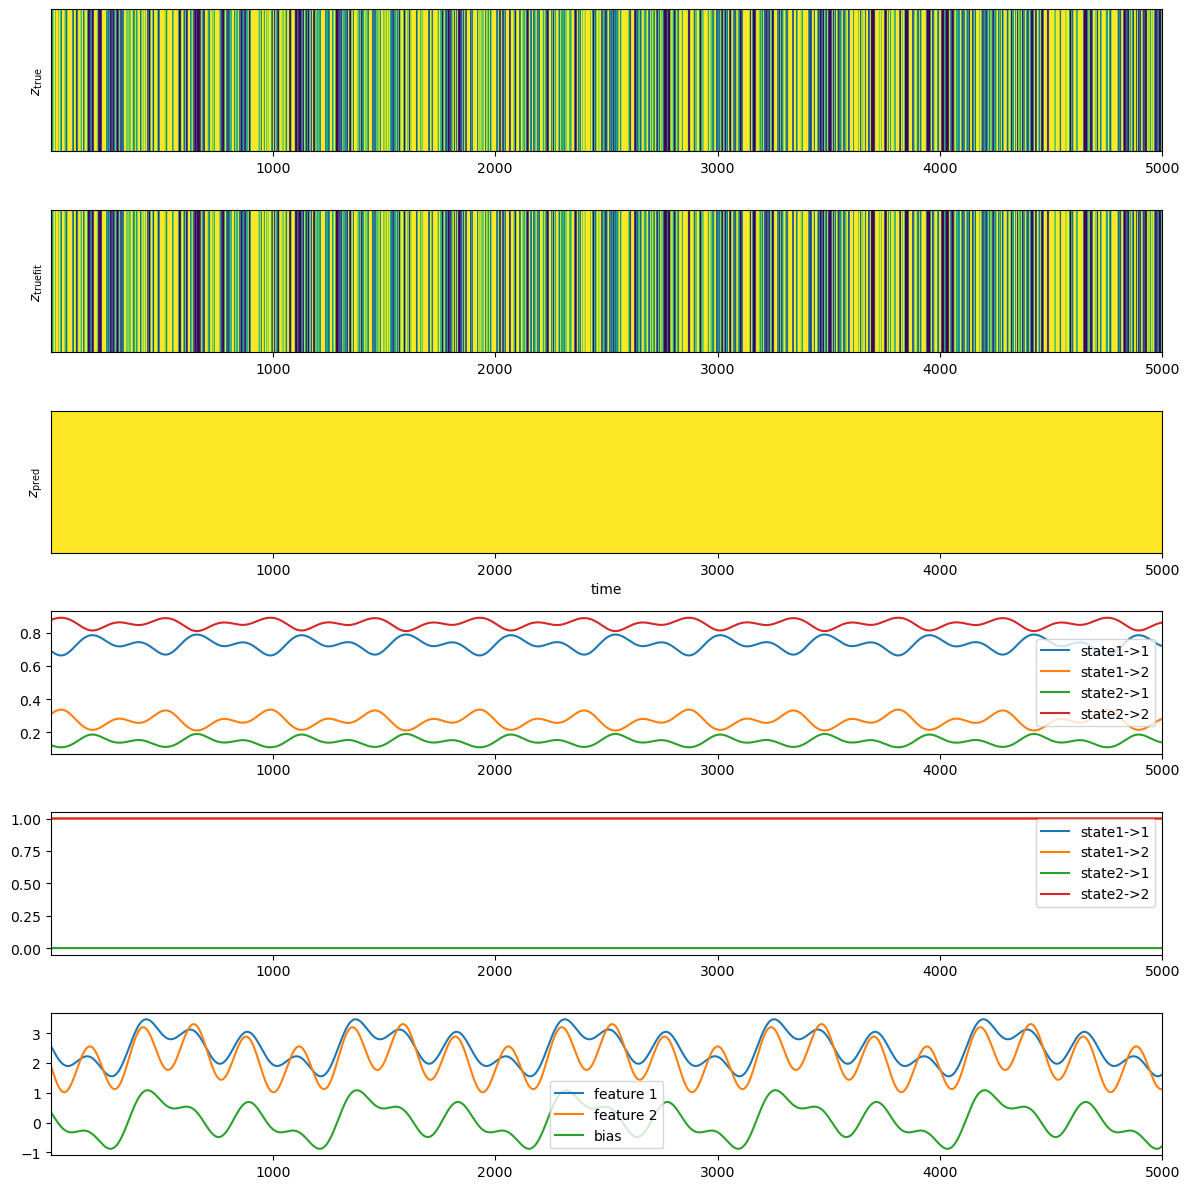

/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


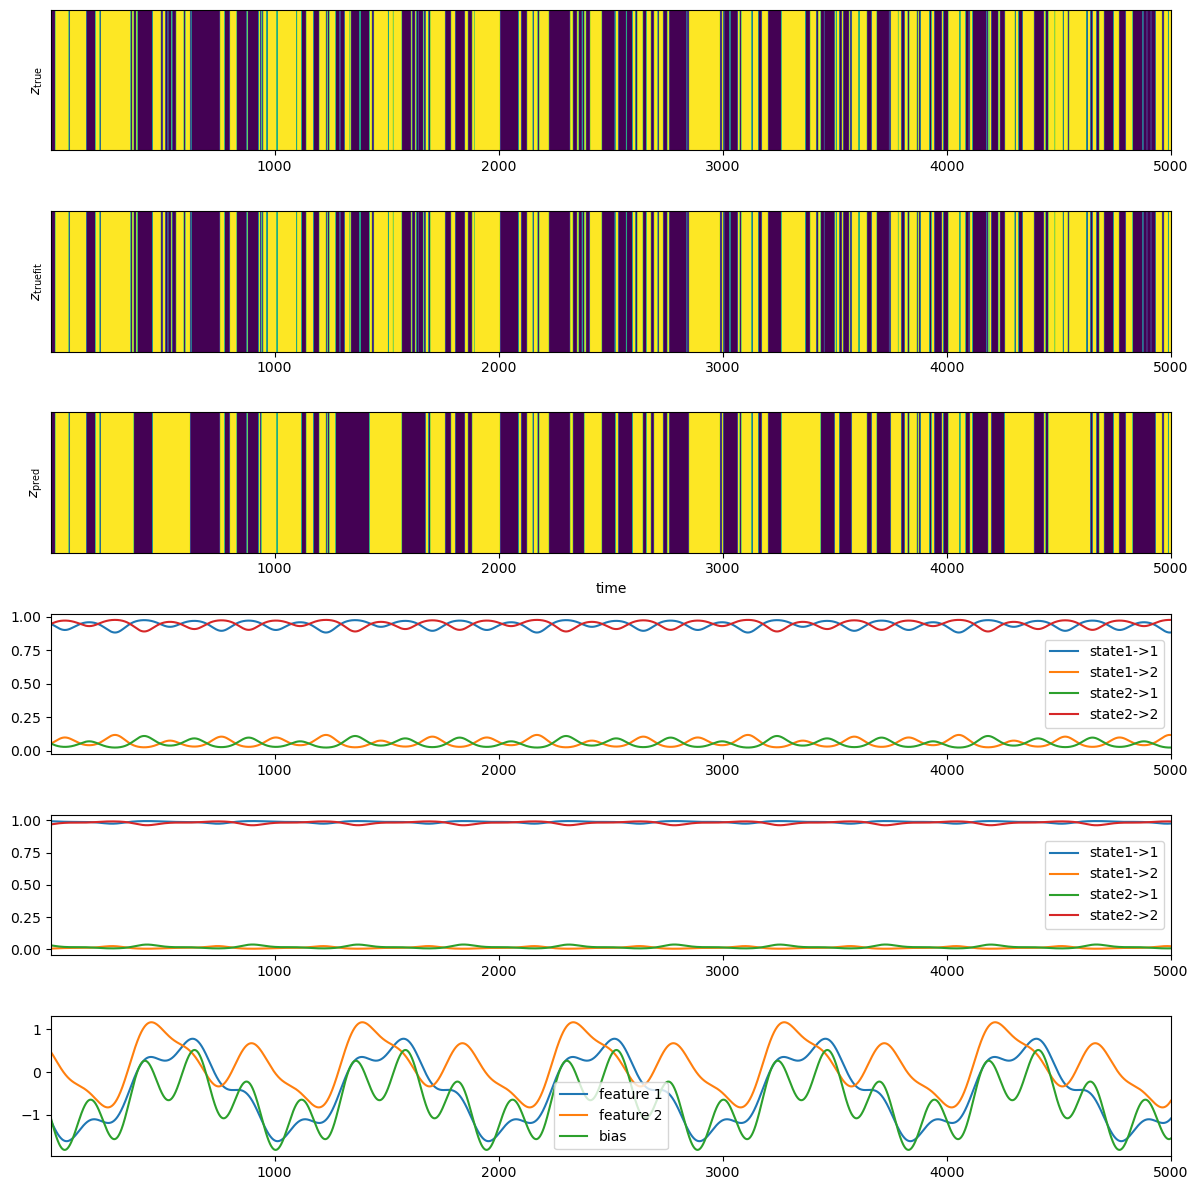

/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


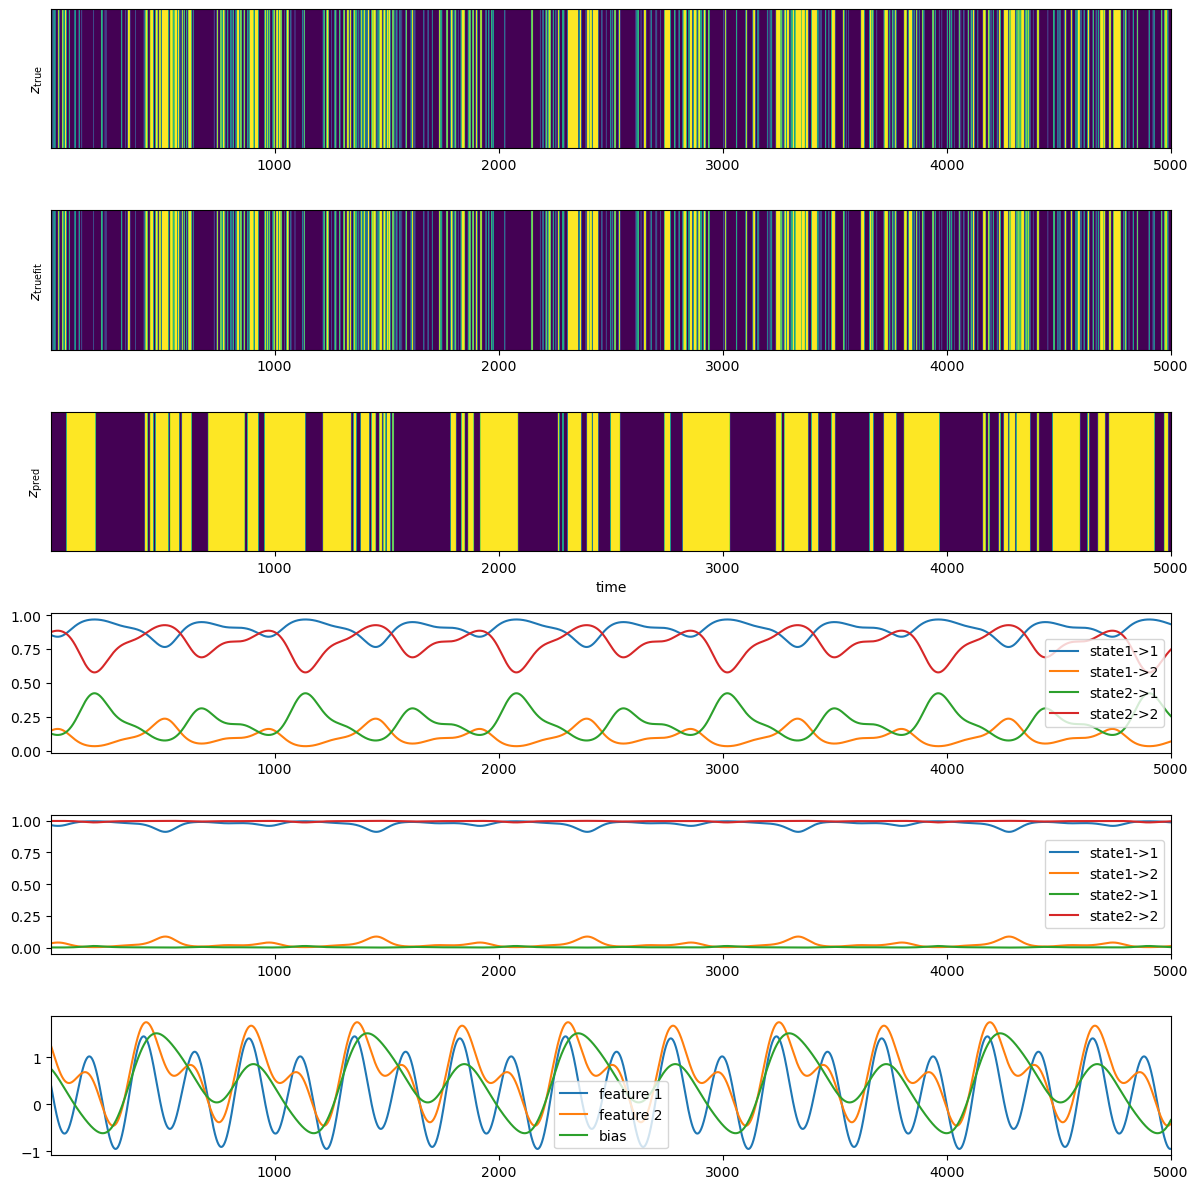

/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


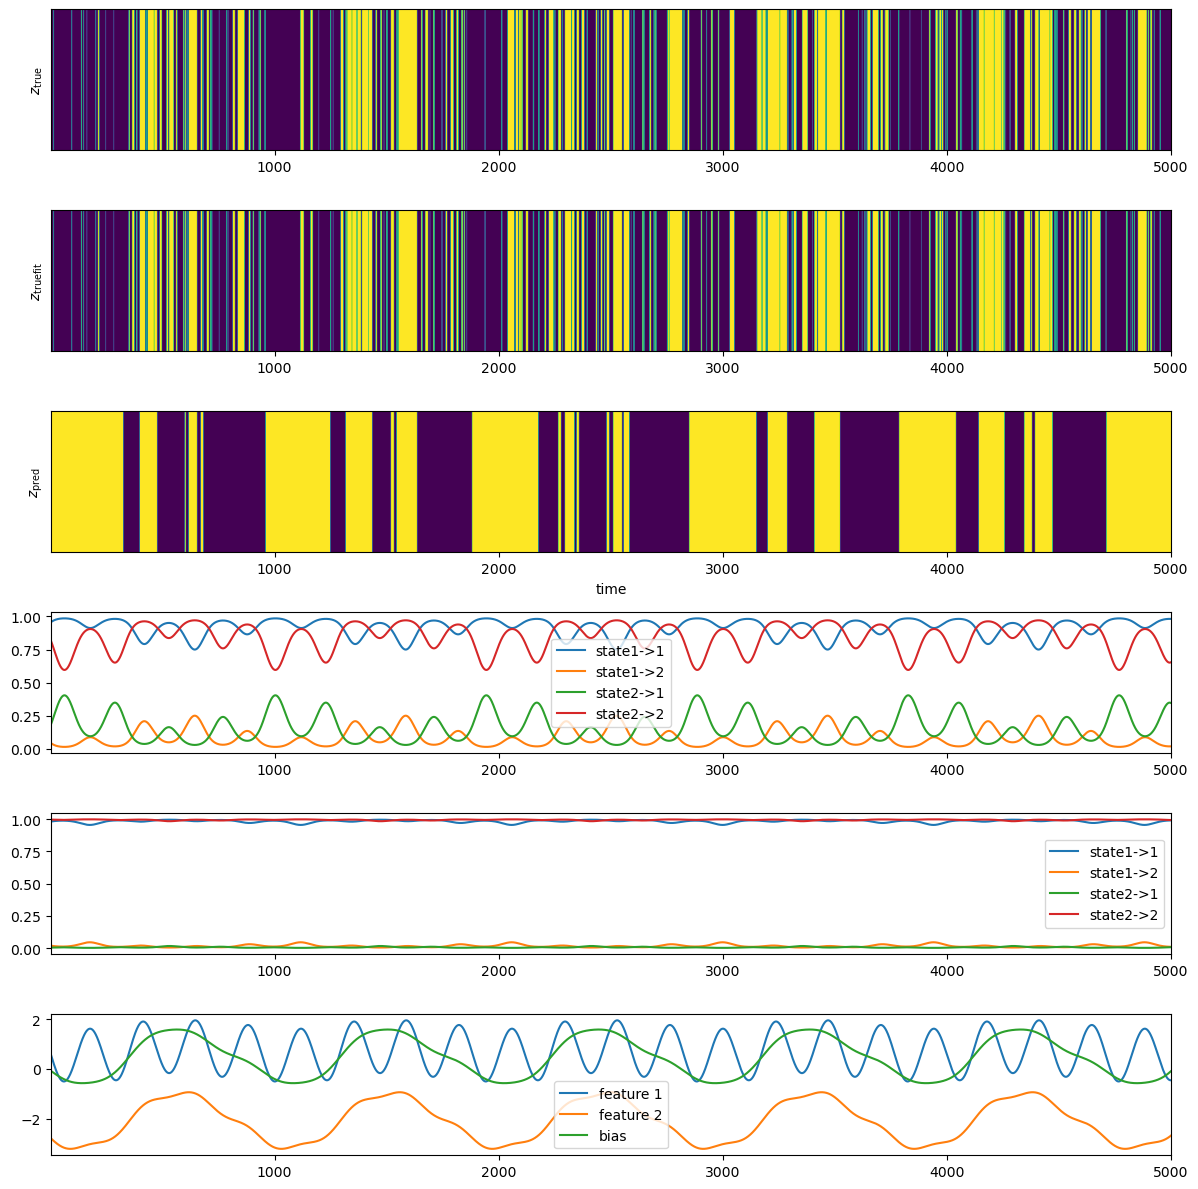

/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


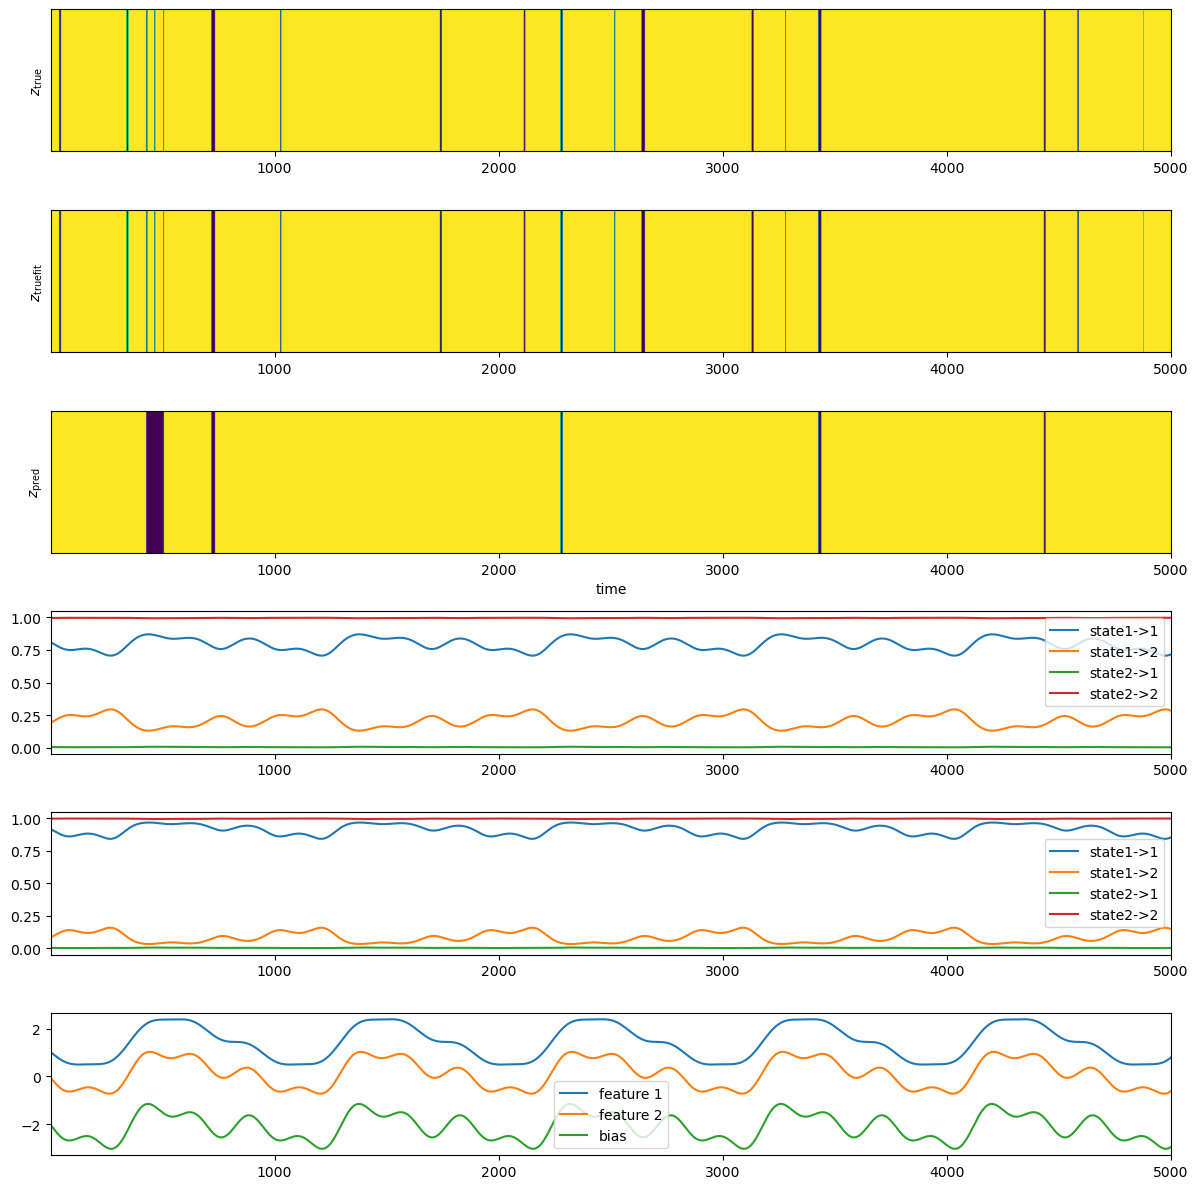

Analysis saved to metric_testing_analysis_results_id.json


In [3]:
from model.analysis import analyze_stored_models_id

storage_all = analyze_stored_models_id(N, K, D, dim_output, None, verbose=True)

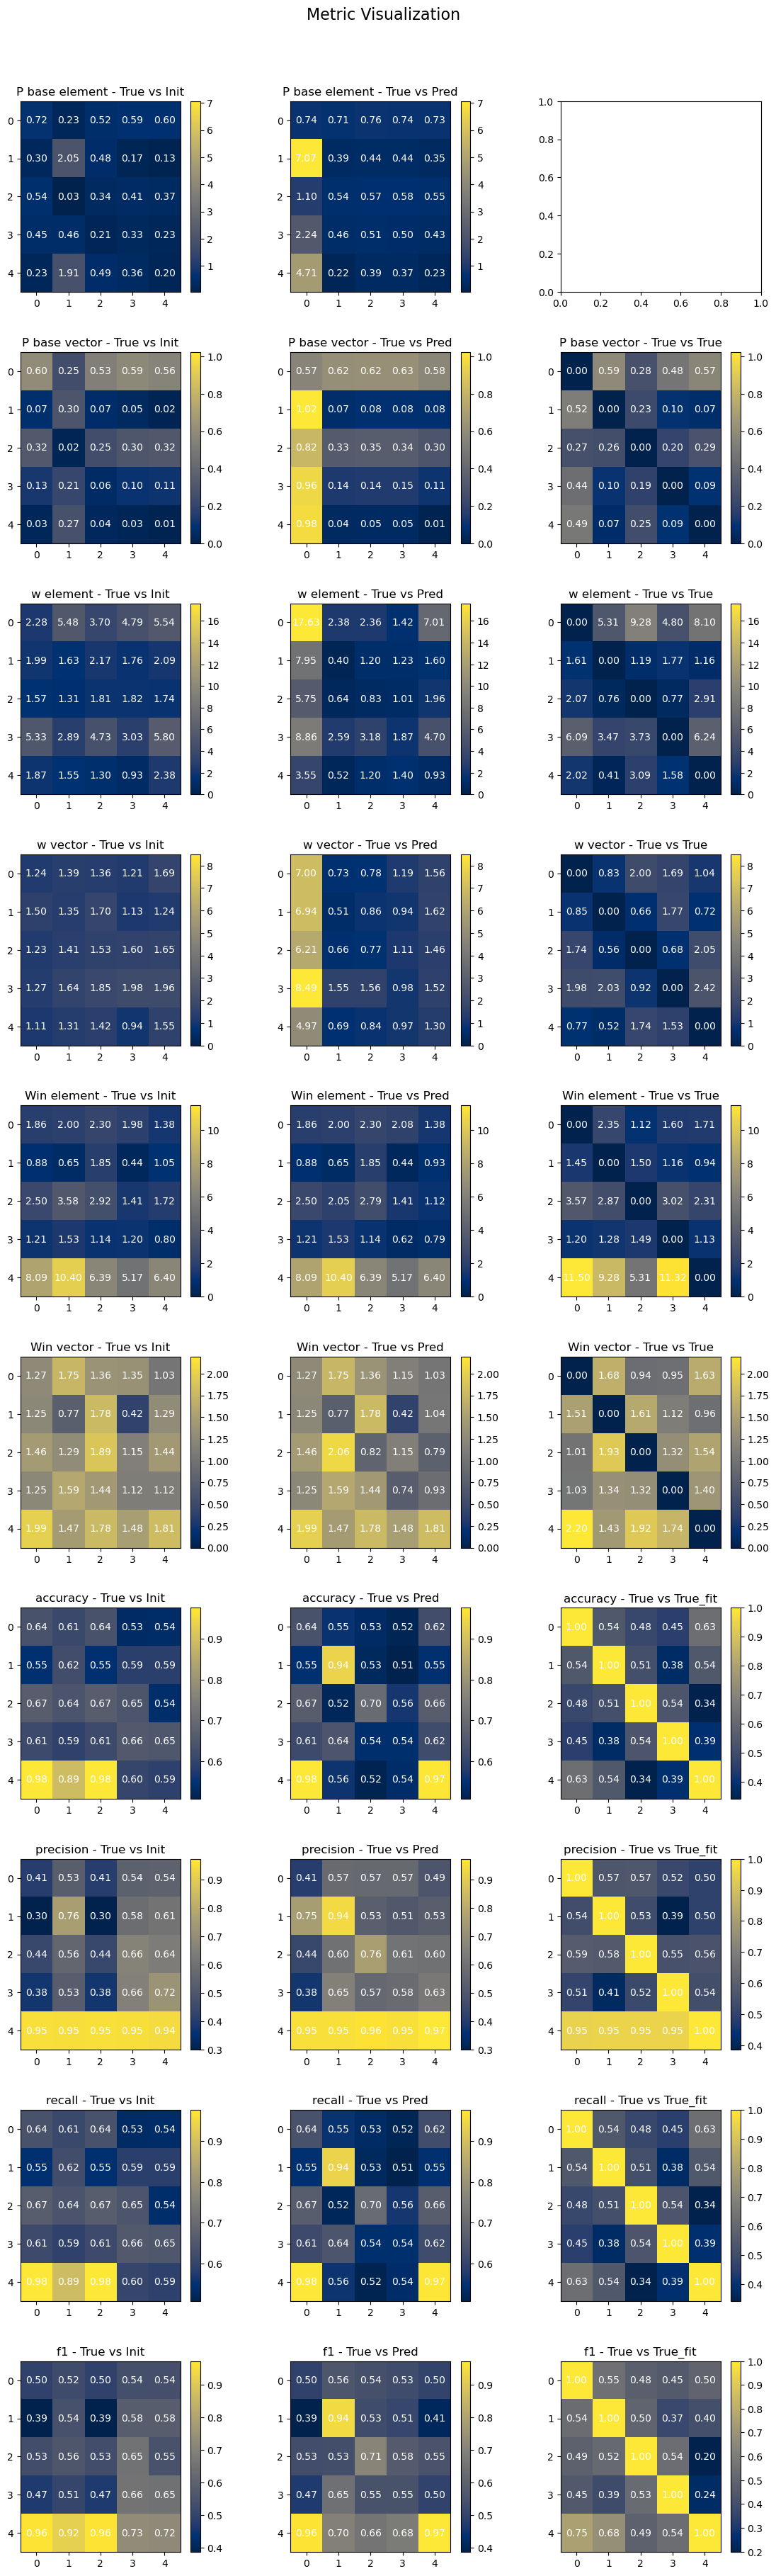

In [4]:
metric_comp(storage_all, model_type = "inputdriven")

In [5]:
N=20000
dim_output=2
D = 2
K = 2
testN = 5000

In [6]:
for _ in range(1):
    train_and_store_model(N, K, D, dim_output, seed=None, testN=testN, model_type = "inputdriven")

sinusoidal weight: [[0.58746508 0.40308943 0.00944548]
 [0.16981992 0.77223407 0.05794602]
 [0.27167449 0.4451888  0.28313671]]


/data/users/weixuan/work/model/glmhmm/IDglmhmm.py:291: RuntimeWarning: divide by zero encountered in log
  likelihood = np.log(self._compute_likelihood(X[t], Y[t]))


Init 1
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Init 2
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Init 3
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20
Iter 21
Iter 22
Iter 23
Iter 24
Saved model under N=20000_K=2_D=2_dim_output=2_seed=None in id_metric_testing_model_data.json


Analyzing 2 models for N=10000_K=2_D=2_dim_output=2_seed=None


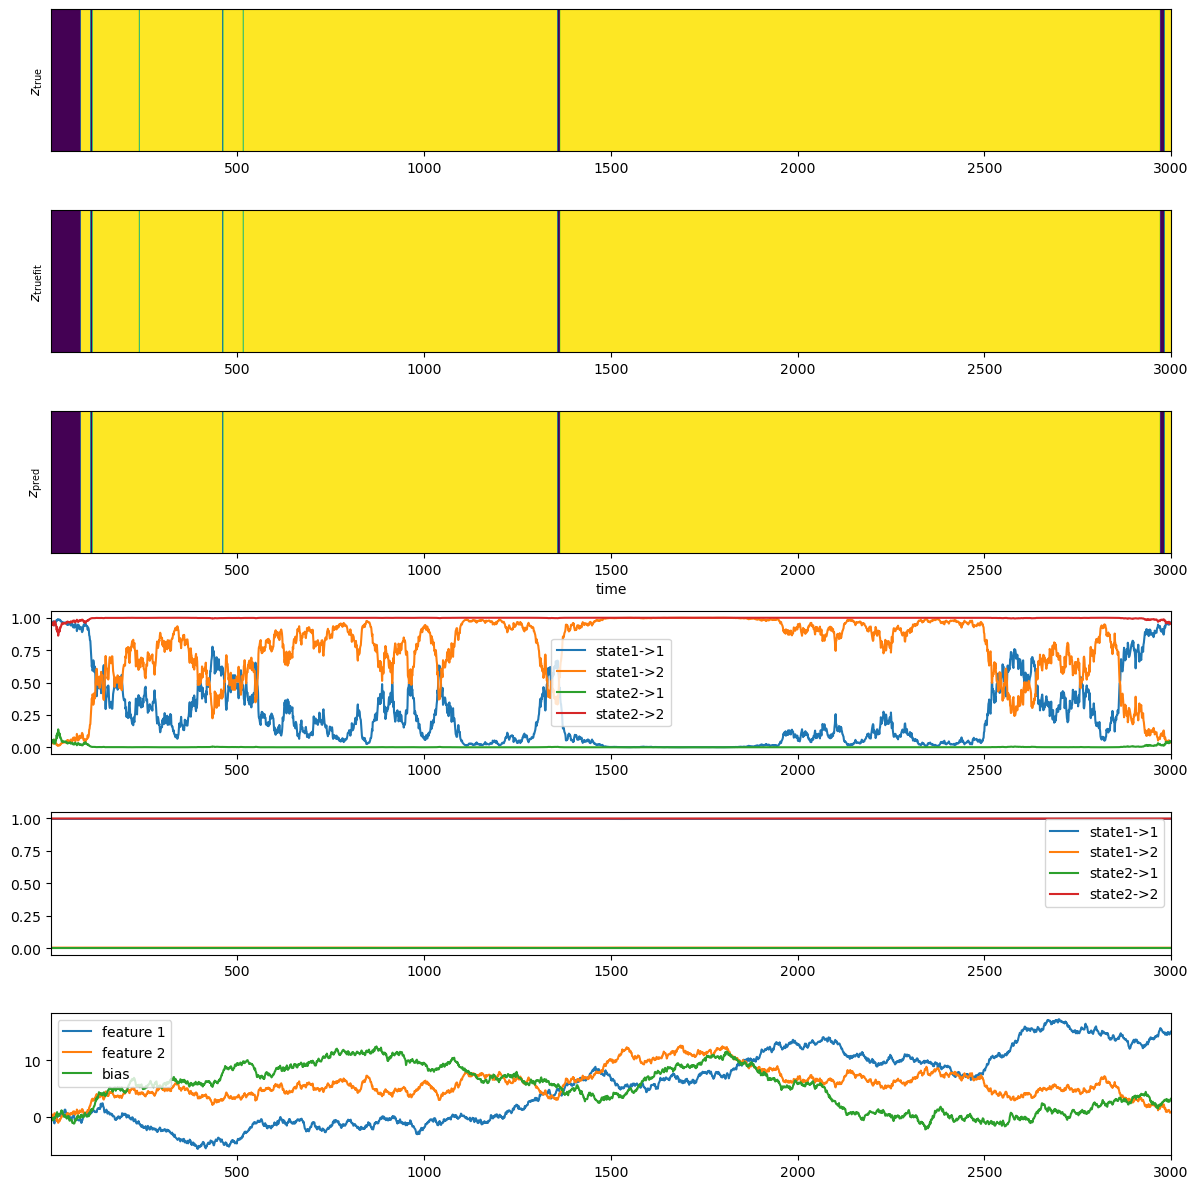

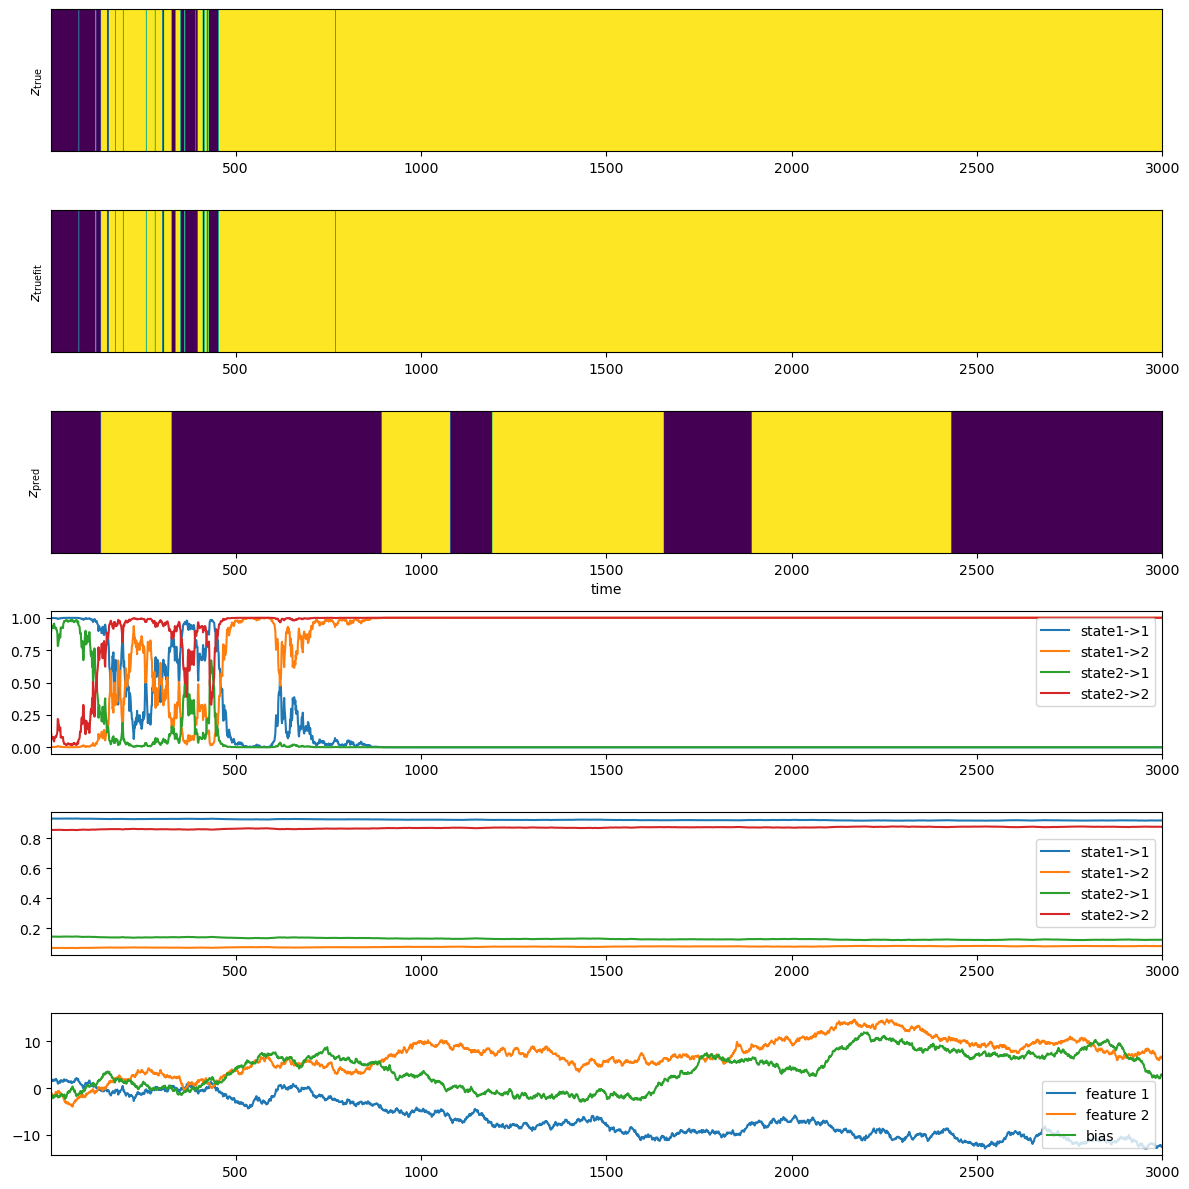

Analysis saved to metric_testing_analysis_results_id.json


In [3]:
from model.analysis import analyze_stored_models_id

storage_all = analyze_stored_models_id(N, K, D, dim_output, None, verbose=True)

In [9]:
import json

with open("id_metric_testing_model_data.json", "r", encoding="utf-8") as file:
    data = json.load(file)

data['N=10000_K=2_D=2_dim_output=2_seed=None'][0].keys(), 

dict_keys(['X', 'Y', 'X_test', 'Y_test', 'P_base_true', 'W_in_true', 'w_true', 'pi0_true', 'true_states_seq', 'true_states_seq_fit', 'P_base_init_all', 'W_in_init_all', 'w_init_all', 'pi0_init_all', 'init_states_seq_all', 'P_base_pred_all', 'W_in_pred_all', 'w_pred_all', 'pi0_pred_all', 'pred_states_seq_all', 'lls_pred_all'])

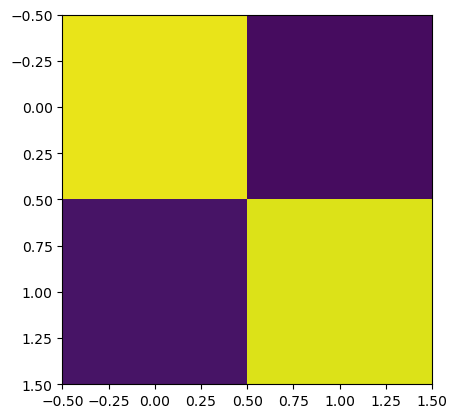

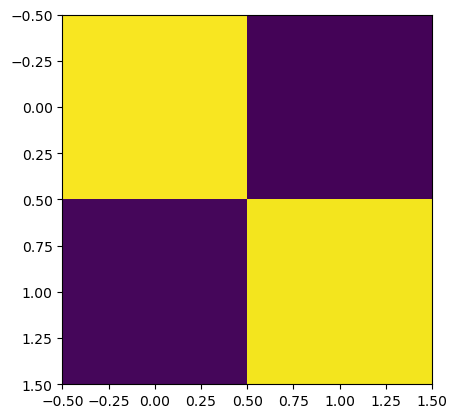

In [13]:
plt.figure()
plt.imshow(data['N=10000_K=2_D=2_dim_output=2_seed=None'][0]['P_base_true'], vmin=0, vmax=1)
plt.figure()
plt.imshow(data['N=10000_K=2_D=2_dim_output=2_seed=None'][0]['P_base_pred_all'][0], vmin=0, vmax=1)